---
1. input points


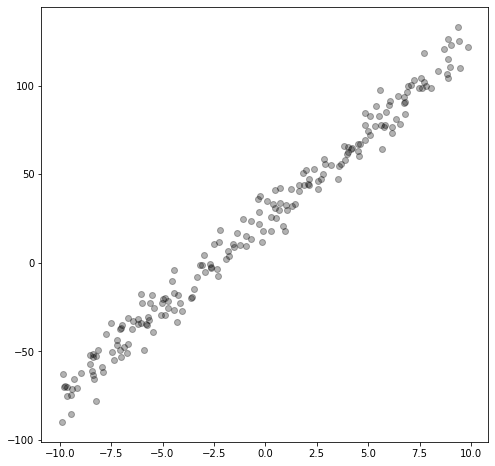

In [0]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3, color='k')
plt.show()

- floatting input data.csv as black color 

---
2. linear regression result

In [0]:
def hypothesis(theta_0, theta_1, x_data):
  return theta_0 + theta_1 * x_data

- define hypothesis fucntions

In [0]:
def l2_loss (h, y_data):
  m = len(h)  # the number of sample is 200
  ret = np.sum((h-y_data)*(h-y_data)) / (2*m)
  return ret

- define l2 loss function

In [0]:
def gradient_descent(x, y, theta_0, theta_1, learning_rate=0.01):
  m = len(x)  
  gradient_theta_0 = np.sum(hypothesis(theta_0, theta_1, x) - y) / m
  gradient_theta_1 = np.sum((hypothesis(theta_0, theta_1, x) - y) * x) / m

  new_theta_0 = theta_0 - learning_rate * gradient_theta_0
  new_theta_1 = theta_1 - learning_rate * gradient_theta_1
  return new_theta_0, new_theta_1

- define gradient descent algorithm

In [0]:
# initialize thetas as -30 each.
theta_0 = -30
theta_1 = -30

theta_0_list = []
theta_1_list = []
loss_list = []

# until converge about 300 steps
converge_step = 300
for i in range(converge_step):
  h = hypothesis(theta_0, theta_1, x_data)

  loss = l2_loss(h, y_data)
  loss_list.append(loss)

  theta_0_list.append(theta_0)
  theta_1_list.append(theta_1)
  theta_0, theta_1 = gradient_descent(x_data, y_data, theta_0, theta_1)

- linear regression process

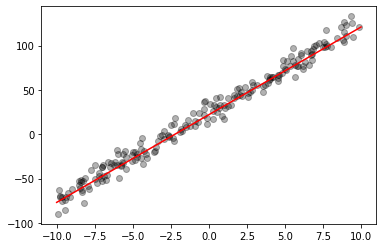

In [0]:
plt.scatter(x_data, y_data, alpha=0.3, color='k')
# print(y_data)
plt.plot([-10, 10], [theta_0 - 10 * theta_1, theta_0 + 10 * theta_1], c='r')
plt.show()

- the estimated red line which are updated 300 steps for convergence are superimposed on the set of points

---
3. plot the energy surface

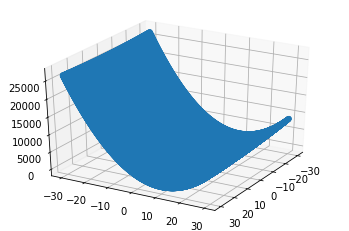

In [0]:
fig = plt.figure('3d plots')
ax = fig.gca(projection='3d')

theta_0_ = np.arange(-30, 30, 0.1)
theta_1_ = np.arange(-30, 30, 0.1)

# loss
th_0_list = []
th_1_list = []
j_list = []

for t_0 in theta_0_:
  for i, t_1 in enumerate(theta_1_):

    th_0_list.append(t_0)
    th_1_list.append(t_1)

    # get loss 
    h = hypothesis(t_0, t_1, x_data)
    j_list.append(l2_loss(h, y_data))

# print(len(th_0_list))  # 360000
# print(len(th_1_list))  # 360000
# print(len(j_list))  # 360000

ax.scatter(th_0_list, th_1_list, j_list)
ax.view_init(30, 30)
plt.show()

- set the thetas from -30 to 30 as 0.1 gap and its corresponding losses
- draw plots using plt library

---
4. plot the gradient descent path on the energy surface

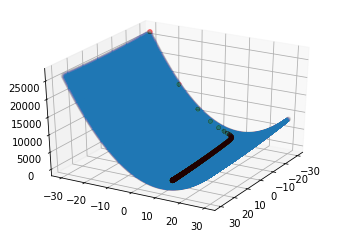

In [0]:
# ax.scatter(th_0_list, th_1_list, j_list, alpha=0.3)
fig = plt.figure('3d plots2')
ax = fig.gca(projection='3d')
ax.scatter(th_0_list, th_1_list, j_list, alpha=0.005)
ax.scatter(theta_0_list, theta_1_list, loss_list, alpha=0.5, color='r')
ax.view_init(30, 30)
plt.show()

- gradienct descent algorithm went on step 300 which is converged.
- plot whole loss surfaces gradient pathes.